## Importações

In [10]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from warnings import filterwarnings
filterwarnings('ignore')

## Carregando os dados

In [11]:
data = datasets.load_breast_cancer()
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [12]:
df = pd.DataFrame(data['data'],columns=data['feature_names']).assign(target = data['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.shape

(569, 31)

## Preparando os dados

In [14]:
x = df.drop(['target'],axis=1)
y = df.target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Pipeline

In [16]:
model_pipe = make_pipeline(MinMaxScaler(),
                           DecisionTreeClassifier(criterion='entropy',
                                                  min_samples_leaf=25,
                                                  max_depth=10,
                                                  random_state=42)
                          )

In [17]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=25,
                                        random_state=42))])

## Avaliando o resultado

In [19]:
y_pred = model_pipe.predict(x_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



## Indo além

In [25]:
N_MODELS = 100

In [26]:
models = []
results = []

for model in range(N_MODELS):
    model_pipe.fit(x_train,y_train)
    y_pred = model_pipe.predict(x_test)
    result = classification_report(y_test,y_pred,output_dict=True)
    models.append(model_pipe)
    results.append((result['0']['f1-score'],result['1']['f1-score']))
else:
    results = np.array(results)

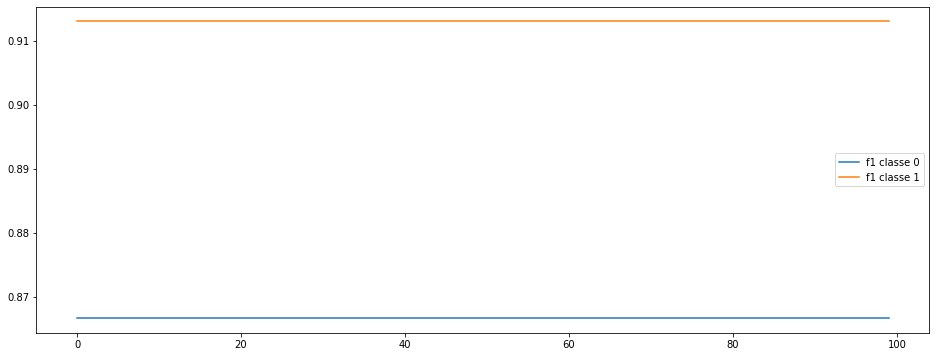

In [27]:
f, ax = plt.subplots(figsize=(16,6))

ax.plot(results[:,0],label='f1 classe 0')
ax.plot(results[:,1],label='f1 classe 1')
ax.legend()
plt.show()

## Modificando parâmetros

In [28]:
model_pipe.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                          random_state=42))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=25,
                        random_state=42),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 25,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf':

In [35]:
models = []
results = []

for model in range(N_MODELS):
    model_pipe.set_params(decisiontreeclassifier__min_samples_leaf=np.random.randint(10,25),
                          decisiontreeclassifier__random_state=np.random.randint(0,100),
                          decisiontreeclassifier__max_depth=np.random.randint(5,20))
    model_pipe.fit(x_train.sample(455,random_state=42,replace=True),y_train.sample(455,random_state=42,replace=True))
    y_pred = model_pipe.predict(x_test)
    result = classification_report(y_test,y_pred,output_dict=True)
    models.append(model_pipe)
    results.append((result['0']['f1-score'],result['1']['f1-score']))
else:
    results = np.array(results)

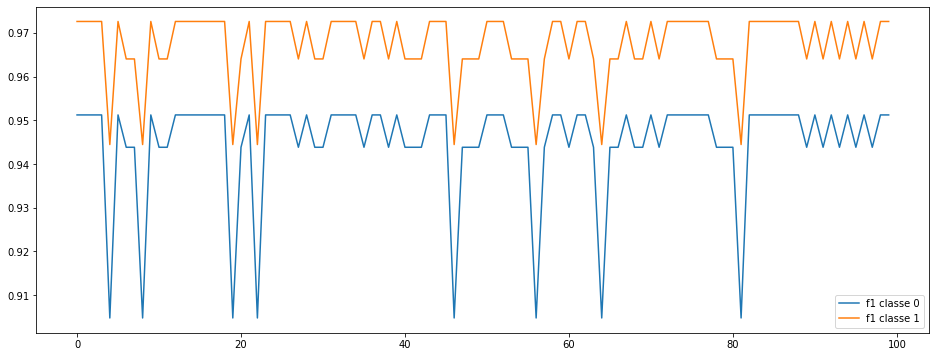

In [36]:
f, ax = plt.subplots(figsize=(16,6))

ax.plot(results[:,0],label='f1 classe 0')
ax.plot(results[:,1],label='f1 classe 1')
ax.legend()
plt.show()

## RandomForests

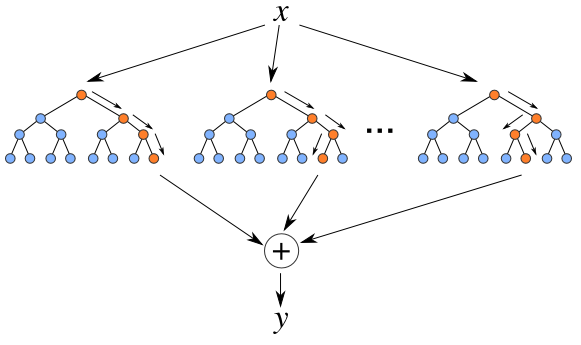

In [58]:
pipe_rf = make_pipeline(MinMaxScaler(),RandomForestClassifier(n_estimators=400,
                                                              criterion='entropy',
                                                              max_depth=10,
                                                              random_state=42))

In [59]:
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=400, random_state=42))])

In [60]:
y_pred = pipe_rf.predict(x_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [62]:
x_test.iloc[0].values

array([1.247e+01, 1.860e+01, 8.109e+01, 4.819e+02, 9.965e-02, 1.058e-01,
       8.005e-02, 3.821e-02, 1.925e-01, 6.373e-02, 3.961e-01, 1.044e+00,
       2.497e+00, 3.029e+01, 6.953e-03, 1.911e-02, 2.701e-02, 1.037e-02,
       1.782e-02, 3.586e-03, 1.497e+01, 2.464e+01, 9.605e+01, 6.779e+02,
       1.426e-01, 2.378e-01, 2.671e-01, 1.015e-01, 3.014e-01, 8.750e-02])

In [63]:
pipe_rf.predict_proba([x_test.iloc[0].values])

array([[0.0375, 0.9625]])

In [56]:
pipe_rf.named_steps

{'minmaxscaler': MinMaxScaler(),
 'randomforestclassifier': RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=400,
                        random_state=33)}

In [64]:
pipe_rf.named_steps['randomforestclassifier'].estimators_[:10]

[DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=787846414),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=996406378),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                        random_state=423734972),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
             

In [66]:
len(pipe_rf.named_steps['randomforestclassifier'].estimators_)

400

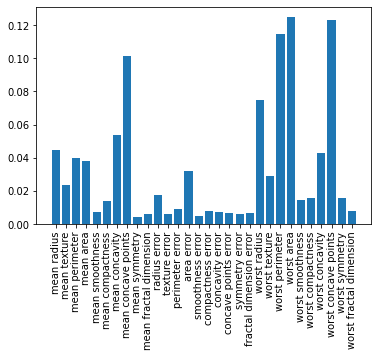

In [81]:
plt.bar(x=pipe_rf.feature_names_in_,height = pipe_rf.named_steps['randomforestclassifier'].feature_importances_)
plt.xticks(rotation=90);

In [108]:
import shap

x_test_scaled = pipe_rf.named_steps['minmaxscaler'].transform([x_test.iloc[0].values])
x_test_scaled

explainer = shap.TreeExplainer(pipe_rf.named_steps['randomforestclassifier'])
shap_values = explainer.shap_values(x_test_scaled)

shap.initjs()
shap.force_plot(explainer.expected_value[1], 
                shap_values[1], 
                x_test_scaled,
                feature_names=pipe_rf.feature_names_in_)

In [68]:
preds = []

for estimator in pipe_rf.named_steps['randomforestclassifier'].estimators_:
    preds.append(estimator.predict(x_test_scaled)[0])

In [72]:
pd.Series(preds).value_counts(normalize=True)

1.0    0.9625
0.0    0.0375
dtype: float64

## RandomForest Regressor

[Documentação Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest%20regressor#sklearn.ensemble.RandomForestRegressor)